In [1]:
from tkinter import Tk, filedialog

root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)

''

In [2]:
from marubatsu import Marubatsu, Marubatsu_GUI
import math
import pickle

def create_event_handler(self):
    # 乱数の種のチェックボックスのイベントハンドラを定義する
    def on_checkbox_changed(changed):
        self.update_widgets_status()
        
    self.checkbox.observe(on_checkbox_changed, names="value")

    # 開く、保存ボタンのイベントハンドラを定義する
    def on_load_button_clicked(b):
        path = filedialog.askopenfilename()
        if path != "":
            with open(path, "rb") as f:
                data = pickle.load(f)
                self.mb.records = data["records"]
                self.mb.ai = data["ai"]
                change_step(data["move_count"])

    def on_save_button_clicked(b):
        path = filedialog.asksaveasfilename()
        if path != "":
            with open(path, "wb") as f:
                data = {
                    "records": self.mb.records,
                    "move_count": self.mb.move_count,
                    "ai": self.mb.ai,
                }
                pickle.dump(data, f)
            
    self.load_button.on_click(on_load_button_clicked)
    self.save_button.on_click(on_save_button_clicked)
    
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i] = None if self.dropdown_list[i].value == "人間" else self.dropdown_list[i].value
        self.mb.play_loop(self)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b=None):
        # 乱数の種のチェックボックスが ON の場合に、乱数の種の処理を行う
        if self.checkbox.value:
            random.seed(self.inttext.value)
        self.mb.restart()
        on_change_button_clicked(b)

    # 待ったボタンのイベントハンドラを定義する
    def on_undo_button_clicked(b=None):
        if self.mb.move_count >= 2 and self.mb.move_count == len(self.mb.records) - 1:
            self.mb.move_count -= 2
            self.mb.records = self.mb.records[0:self.mb.move_count+1]
            self.mb.change_step(self.mb.move_count)
            self.draw_board()
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    self.undo_button.on_click(on_undo_button_clicked)   
    
    # step 手目の局面に移動する
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.draw_board()        

    def on_first_button_clicked(b=None):
        change_step(0)

    def on_prev_button_clicked(b=None):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b=None):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b=None):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        if self.mb.move_count != changed["new"]:
            change_step(changed["new"])
            
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            self.mb.move(x, y)                
            # 次の手番の処理を行うメソッドを呼び出す
            self.mb.play_loop(self)

    # ゲーム盤を選択した状態でキーを押した場合のイベントハンドラ
    def on_key_press(event):
        keymap = {
            "up": on_first_button_clicked,
            "left": on_prev_button_clicked,
            "right": on_next_button_clicked,
            "down": on_last_button_clicked,
            "0": on_undo_button_clicked,
            "enter": on_reset_button_clicked,            
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            try:
                num = int(event.key) - 1
                event.inaxes = True
                event.xdata = num % 3
                event.ydata = 2 - (num // 3)
                on_mouse_down(event)
            except:
                pass
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)   
    
Marubatsu_GUI.create_event_handler = create_event_handler

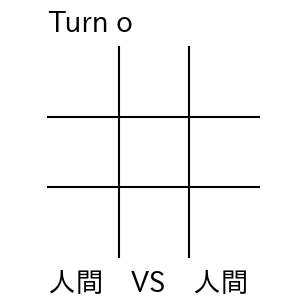

In [3]:
from util import gui_play

gui_play()

In [4]:
filedialog.askopenfilename()
filedialog.askopenfilename(filetypes=[("〇×ゲーム", "*.mbsav")])

''

In [5]:
filedialog.asksaveasfilename(filetypes=[("〇×ゲーム", "*.mbsav")])

''

In [6]:
filedialog.askopenfilename(initialdir="./")

''

In [7]:
filedialog.askopenfilename(initialdir="save")

''

In [8]:
import os

os.mkdir("save")

In [9]:
os.mkdir("save")

FileExistsError: [WinError 183] 既に存在するファイルを作成することはできません。: 'save'

In [10]:
print(os.path.exists("save"))

True


In [11]:
if not os.path.exists("save"):
    os.mkdir("save")

In [12]:
import datetime

print(datetime.datetime.now())

2024-06-06 12:06:22.770140


In [13]:
from datetime import datetime

print(datetime.now())

2024-06-06 12:06:23.668461


In [14]:
print(datetime.now())
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print(datetime.now().strftime("%Y-%m-%d"))
print(datetime.now().strftime("%H:%M:%S"))
print(datetime.now().strftime("%Y年%m月%d日 %H時%M分%S秒"))

2024-06-06 12:19:19.645087
2024-06-06 12:19:19
2024-06-06
12:19:19
2024年06月06日 12時19分19秒


In [15]:
print(filedialog.asksaveasfilename(filetypes=[("〇×ゲーム", "*.mbsav")], initialdir="save",
                                initialfile="人間 VS ai1s 2024年06月04日 23時55分41秒.mbsav"))

C:/Users/ys/ai/marubatsu/087/save/人間 VS ai1s 2024年06月04日 23時55分41秒.mbsav


In [16]:
print(filedialog.asksaveasfilename(filetypes=[("〇×ゲーム", "*.mbsav")], initialdir="save",
                                   initialfile="test", defaultextension="mbsav"))

C:/Users/ys/ai/marubatsu/087/save/test.mbsav


In [17]:
def create_event_handler(self):
    # 乱数の種のチェックボックスのイベントハンドラを定義する
    def on_checkbox_changed(changed):
        self.update_widgets_status()
        
    self.checkbox.observe(on_checkbox_changed, names="value")

    # 開く、保存ボタンのイベントハンドラを定義する
    def on_load_button_clicked(b):
        path = filedialog.askopenfilename(filetypes=[("〇×ゲーム", "*.mbsav")],
                                          initialdir="save")
        if path != "":
            with open(path, "rb") as f:
                data = pickle.load(f)
                self.mb.records = data["records"]
                self.mb.ai = data["ai"]
                change_step(data["move_count"])

    def on_save_button_clicked(b):
        name = ["人間" if self.mb.ai[i] is None else self.mb.ai[i].__name__
                for i in range(2)]
        timestr = datetime.now().strftime("%Y年%m月%d日 %H時%M分%S秒")
        fname = f"{name[0]} VS {name[1]} {timestr}"
        path = filedialog.asksaveasfilename(filetypes=[("〇×ゲーム", "*.mbsav")],
                                            initialdir="save", initialfile=fname,
                                            defaultextension="mbsav")
        if path != "":
            with open(path, "wb") as f:
                data = {
                    "records": self.mb.records,
                    "move_count": self.mb.move_count,
                    "ai": self.mb.ai,
                }
                pickle.dump(data, f)
            
    self.load_button.on_click(on_load_button_clicked)
    self.save_button.on_click(on_save_button_clicked)
    
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i] = None if self.dropdown_list[i].value == "人間" else self.dropdown_list[i].value
        self.mb.play_loop(self)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b=None):
        # 乱数の種のチェックボックスが ON の場合に、乱数の種の処理を行う
        if self.checkbox.value:
            random.seed(self.inttext.value)
        self.mb.restart()
        on_change_button_clicked(b)

    # 待ったボタンのイベントハンドラを定義する
    def on_undo_button_clicked(b=None):
        if self.mb.move_count >= 2 and self.mb.move_count == len(self.mb.records) - 1:
            self.mb.move_count -= 2
            self.mb.records = self.mb.records[0:self.mb.move_count+1]
            self.mb.change_step(self.mb.move_count)
            self.draw_board()
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    self.undo_button.on_click(on_undo_button_clicked)   
    
    # step 手目の局面に移動する
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.draw_board()        

    def on_first_button_clicked(b=None):
        change_step(0)

    def on_prev_button_clicked(b=None):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b=None):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b=None):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        if self.mb.move_count != changed["new"]:
            change_step(changed["new"])
            
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            self.mb.move(x, y)                
            # 次の手番の処理を行うメソッドを呼び出す
            self.mb.play_loop(self)

    # ゲーム盤を選択した状態でキーを押した場合のイベントハンドラ
    def on_key_press(event):
        keymap = {
            "up": on_first_button_clicked,
            "left": on_prev_button_clicked,
            "right": on_next_button_clicked,
            "down": on_last_button_clicked,
            "0": on_undo_button_clicked,
            "enter": on_reset_button_clicked,            
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            try:
                num = int(event.key) - 1
                event.inaxes = True
                event.xdata = num % 3
                event.ydata = 2 - (num // 3)
                on_mouse_down(event)
            except:
                pass
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)   
    
Marubatsu_GUI.create_event_handler = create_event_handler

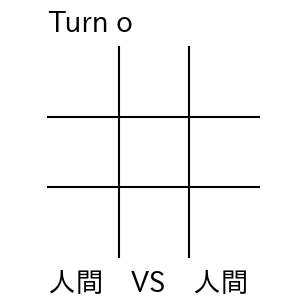

In [18]:
gui_play()

In [19]:
import random

def create_event_handler(self):
    # 乱数の種のチェックボックスのイベントハンドラを定義する
    def on_checkbox_changed(changed):
        self.update_widgets_status()
        
    self.checkbox.observe(on_checkbox_changed, names="value")

    # 開く、保存ボタンのイベントハンドラを定義する
    def on_load_button_clicked(b):
        path = filedialog.askopenfilename(filetypes=[("〇×ゲーム", "*.mbsav")],
                                          initialdir="save")
        if path != "":
            with open(path, "rb") as f:
                data = pickle.load(f)
                self.mb.records = data["records"]
                self.mb.ai = data["ai"]
                change_step(data["move_count"])
                for i in range(2):
                    value = "人間" if self.mb.ai[i] is None else self.mb.ai[i]
                    self.dropdown_list[i].value = value               
                if data["seed"] is not None:                   
                    self.checkbox.value = True
                    self.inttext.value = data["seed"]
                else:
                    self.checkbox.value = False
                    
    def on_save_button_clicked(b):
        name = ["人間" if self.mb.ai[i] is None else self.mb.ai[i].__name__
                for i in range(2)]
        timestr = datetime.now().strftime("%Y年%m月%d日 %H時%M分%S秒")
        fname = f"{name[0]} VS {name[1]} {timestr}"
        path = filedialog.asksaveasfilename(filetypes=[("〇×ゲーム", "*.mbsav")],
                                            initialdir="save", initialfile=fname,
                                            defaultextension="mbsav")
        if path != "":
            with open(path, "wb") as f:
                data = {
                    "records": self.mb.records,
                    "move_count": self.mb.move_count,
                    "ai": self.mb.ai,
                    "seed": self.inttext.value if self.checkbox.value else None
                }
                pickle.dump(data, f)
            
    self.load_button.on_click(on_load_button_clicked)
    self.save_button.on_click(on_save_button_clicked)
    
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i] = None if self.dropdown_list[i].value == "人間" else self.dropdown_list[i].value
        self.mb.play_loop(self)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b=None):
        # 乱数の種のチェックボックスが ON の場合に、乱数の種の処理を行う
        if self.checkbox.value:
            random.seed(self.inttext.value)
        self.mb.restart()
        on_change_button_clicked(b)

    # 待ったボタンのイベントハンドラを定義する
    def on_undo_button_clicked(b=None):
        if self.mb.move_count >= 2 and self.mb.move_count == len(self.mb.records) - 1:
            self.mb.move_count -= 2
            self.mb.records = self.mb.records[0:self.mb.move_count+1]
            self.mb.change_step(self.mb.move_count)
            self.draw_board()
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    self.undo_button.on_click(on_undo_button_clicked)   
    
    # step 手目の局面に移動する
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.draw_board()        

    def on_first_button_clicked(b=None):
        change_step(0)

    def on_prev_button_clicked(b=None):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b=None):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b=None):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        if self.mb.move_count != changed["new"]:
            change_step(changed["new"])
            
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            self.mb.move(x, y)                
            # 次の手番の処理を行うメソッドを呼び出す
            self.mb.play_loop(self)

    # ゲーム盤を選択した状態でキーを押した場合のイベントハンドラ
    def on_key_press(event):
        keymap = {
            "up": on_first_button_clicked,
            "left": on_prev_button_clicked,
            "right": on_next_button_clicked,
            "down": on_last_button_clicked,
            "0": on_undo_button_clicked,
            "enter": on_reset_button_clicked,            
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            try:
                num = int(event.key) - 1
                event.inaxes = True
                event.xdata = num % 3
                event.ydata = 2 - (num // 3)
                on_mouse_down(event)
            except:
                pass
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)   
    
Marubatsu_GUI.create_event_handler = create_event_handler

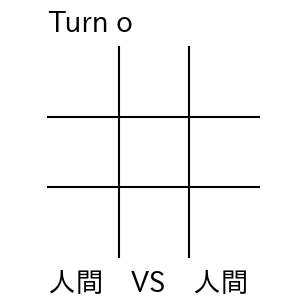

( 1 , 1 ) のマスにはマークが配置済です
( 0 , 0 ) のマスにはマークが配置済です


In [20]:
gui_play()

In [21]:
import ipywidgets as widgets

output = widgets.Output()
display(output)

Output()

In [22]:
with output:
    print("output message")

print("message")

message


In [23]:
output.clear_output()

In [24]:
def create_widgets(self):
    # 乱数の種の Checkbox と IntText を作成する
    self.checkbox = widgets.Checkbox(value=self.seed is not None, description="乱数の種",
                                    indent=False, layout=widgets.Layout(width="100px"))
    self.inttext = widgets.IntText(value=0 if self.seed is None else self.seed,
                                layout=widgets.Layout(width="100px"))   

    # 読み書きのボタンを作成する
    self.load_button = self.create_button("開く", 100)
    self.save_button = self.create_button("保存", 100)
    
    # AI を選択する Dropdown を作成する
    self.create_dropdown()
    # 変更、リセット、待ったボタンを作成する
    self.change_button = self.create_button("変更", 50)
    self.reset_button = self.create_button("リセット", 80)
    self.undo_button = self.create_button("待った", 60)    
    
    # リプレイのボタンとスライダーを作成する
    self.first_button = self.create_button("<<", 50)
    self.prev_button = self.create_button("<", 50)
    self.next_button = self.create_button(">", 50)
    self.last_button = self.create_button(">>", 50)     
    self.slider = widgets.IntSlider(layout=widgets.Layout(width="200px"))
    # ゲーム盤の画像を表す figure を作成する
    self.create_figure()

    # print による文字列を表示する Output を作成する
    self.output = widgets.Output()

Marubatsu_GUI.create_widgets = create_widgets

In [25]:
def display_widgets(self):
    # 乱数の種のウィジェット、読み書きのボタンを横に配置した HBox を作成する
    hbox1 = widgets.HBox([self.checkbox, self.inttext, self.load_button, self.save_button])
    # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
    hbox2 = widgets.HBox([self.dropdown_list[0], self.dropdown_list[1], self.change_button, self.reset_button, self.undo_button])
    # リプレイ機能のボタンを横に配置した HBox を作成する
    hbox3 = widgets.HBox([self.first_button, self.prev_button, self.next_button, self.last_button, self.slider]) 
    # hbox1 ~ hbox3、Output を縦に配置した VBox を作成し、表示する
    display(widgets.VBox([hbox1, hbox2, hbox3, self.output]))
    
Marubatsu_GUI.display_widgets = display_widgets 

In [26]:
def create_event_handler(self):
    # 乱数の種のチェックボックスのイベントハンドラを定義する
    def on_checkbox_changed(changed):
        self.update_widgets_status()
        
    self.checkbox.observe(on_checkbox_changed, names="value")

    # 開く、保存ボタンのイベントハンドラを定義する
    def on_load_button_clicked(b):
        path = filedialog.askopenfilename(filetypes=[("〇×ゲーム", "*.mbsav")],
                                          initialdir="save")
        if path != "":
            with open(path, "rb") as f:
                data = pickle.load(f)
                self.mb.records = data["records"]
                self.mb.ai = data["ai"]
                change_step(data["move_count"])
                for i in range(2):
                    value = "人間" if self.mb.ai[i] is None else self.mb.ai[i]
                    self.dropdown_list[i].value = value               
                if data["seed"] is not None:                   
                    self.checkbox.value = True
                    self.inttext.value = data["seed"]
                else:
                    self.checkbox.value = False
                    
    def on_save_button_clicked(b):
        name = ["人間" if self.mb.ai[i] is None else self.mb.ai[i].__name__
                for i in range(2)]
        timestr = datetime.now().strftime("%Y年%m月%d日 %H時%M分%S秒")
        fname = f"{name[0]} VS {name[1]} {timestr}"
        path = filedialog.asksaveasfilename(filetypes=[("〇×ゲーム", "*.mbsav")],
                                            initialdir="save", initialfile=fname,
                                            defaultextension="mbsav")
        if path != "":
            with open(path, "wb") as f:
                data = {
                    "records": self.mb.records,
                    "move_count": self.mb.move_count,
                    "ai": self.mb.ai,
                    "seed": self.inttext.value if self.checkbox.value else None
                }
                pickle.dump(data, f)
            
    self.load_button.on_click(on_load_button_clicked)
    self.save_button.on_click(on_save_button_clicked)
    
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i] = None if self.dropdown_list[i].value == "人間" else self.dropdown_list[i].value
        self.mb.play_loop(self)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b=None):
        # 乱数の種のチェックボックスが ON の場合に、乱数の種の処理を行う
        if self.checkbox.value:
            random.seed(self.inttext.value)
        self.mb.restart()
        self.output.clear_output()
        on_change_button_clicked(b)

    # 待ったボタンのイベントハンドラを定義する
    def on_undo_button_clicked(b=None):
        if self.mb.move_count >= 2 and self.mb.move_count == len(self.mb.records) - 1:
            self.mb.move_count -= 2
            self.mb.records = self.mb.records[0:self.mb.move_count+1]
            self.mb.change_step(self.mb.move_count)
            self.draw_board()
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    self.undo_button.on_click(on_undo_button_clicked)   
    
    # step 手目の局面に移動する
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.draw_board()        

    def on_first_button_clicked(b=None):
        change_step(0)

    def on_prev_button_clicked(b=None):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b=None):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b=None):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        if self.mb.move_count != changed["new"]:
            change_step(changed["new"])
            
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            with self.output:
                self.mb.move(x, y)                
            # 次の手番の処理を行うメソッドを呼び出す
            self.mb.play_loop(self)

    # ゲーム盤を選択した状態でキーを押した場合のイベントハンドラ
    def on_key_press(event):
        keymap = {
            "up": on_first_button_clicked,
            "left": on_prev_button_clicked,
            "right": on_next_button_clicked,
            "down": on_last_button_clicked,
            "0": on_undo_button_clicked,
            "enter": on_reset_button_clicked,            
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            try:
                num = int(event.key) - 1
                event.inaxes = True
                event.xdata = num % 3
                event.ydata = 2 - (num // 3)
                on_mouse_down(event)
            except:
                pass
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)   
    
Marubatsu_GUI.create_event_handler = create_event_handler

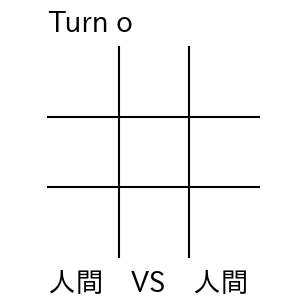

In [27]:
gui_play()

In [28]:
def display_widgets(self):
    # 乱数の種のウィジェット、読み書きのボタンを横に配置した HBox を作成する
    hbox1 = widgets.HBox([self.checkbox, self.inttext, self.load_button, self.save_button])
    # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
    hbox2 = widgets.HBox([self.dropdown_list[0], self.dropdown_list[1], self.change_button, self.reset_button, self.undo_button])
    # リプレイ機能のボタンを横に配置した HBox を作成する
    hbox3 = widgets.HBox([self.first_button, self.prev_button, self.next_button, self.last_button, self.slider]) 
    # hbox1 ~ hbox3、Figure、Output を縦に配置した VBox を作成し、表示する
    display(widgets.VBox([hbox1, hbox2, hbox3, self.fig.canvas, self.output]))
    
Marubatsu_GUI.display_widgets = display_widgets 

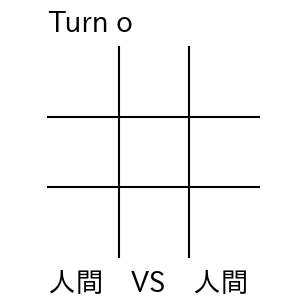

In [29]:
gui_play()

In [30]:
import matplotlib.pyplot as plt

def create_figure(self):
    plt.ioff()
    self.fig, self.ax = plt.subplots(figsize=[self.size, self.size])
    plt.ion()
    self.fig.canvas.toolbar_visible = False
    self.fig.canvas.header_visible = False
    self.fig.canvas.footer_visible = False
    self.fig.canvas.resizable = False
    
Marubatsu_GUI.create_figure = create_figure

In [31]:
def create_figure(self):
    with plt.ioff():
        self.fig, self.ax = plt.subplots(figsize=[self.size, self.size])
    self.fig.canvas.toolbar_visible = False
    self.fig.canvas.header_visible = False
    self.fig.canvas.footer_visible = False
    self.fig.canvas.resizable = False
    
Marubatsu_GUI.create_figure = create_figure

In [32]:
gui_play()

In [33]:
def create_widgets(self):
    # 乱数の種の Checkbox と IntText を作成する
    self.checkbox = widgets.Checkbox(value=self.seed is not None, description="乱数の種",
                                    indent=False, layout=widgets.Layout(width="100px"))
    self.inttext = widgets.IntText(value=0 if self.seed is None else self.seed,
                                layout=widgets.Layout(width="100px"))   

    # 読み書き、ヘルプのボタンを作成する
    self.load_button = self.create_button("開く", 80)
    self.save_button = self.create_button("保存", 80)
    self.help_button = self.create_button("？", 30)
    
    # AI を選択する Dropdown を作成する
    self.create_dropdown()
    # 変更、リセット、待ったボタンを作成する
    self.change_button = self.create_button("変更", 50)
    self.reset_button = self.create_button("リセット", 80)
    self.undo_button = self.create_button("待った", 60)    
    
    # リプレイのボタンとスライダーを作成する
    self.first_button = self.create_button("<<", 50)
    self.prev_button = self.create_button("<", 50)
    self.next_button = self.create_button(">", 50)
    self.last_button = self.create_button(">>", 50)     
    self.slider = widgets.IntSlider(layout=widgets.Layout(width="200px"))
    # ゲーム盤の画像を表す figure を作成する
    self.create_figure()

    # print による文字列を表示する Output を作成する
    self.output = widgets.Output()

Marubatsu_GUI.create_widgets = create_widgets

In [34]:
def display_widgets(self):
    # 乱数の種のウィジェット、読み書き、ヘルプのボタンを横に配置した HBox を作成する
    hbox1 = widgets.HBox([self.checkbox, self.inttext, self.load_button, 
                          self.save_button, self.help_button])
    # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
    hbox2 = widgets.HBox([self.dropdown_list[0], self.dropdown_list[1], self.change_button, self.reset_button, self.undo_button])
    # リプレイ機能のボタンを横に配置した HBox を作成する
    hbox3 = widgets.HBox([self.first_button, self.prev_button, self.next_button, self.last_button, self.slider]) 
    # hbox1 ~ hbox3、Figure、Output を縦に配置した VBox を作成し、表示する
    display(widgets.VBox([hbox1, hbox2, hbox3, self.fig.canvas, self.output]))
    
Marubatsu_GUI.display_widgets = display_widgets 

In [37]:
def create_event_handler(self):
    # 乱数の種のチェックボックスのイベントハンドラを定義する
    def on_checkbox_changed(changed):
        self.update_widgets_status()
        
    self.checkbox.observe(on_checkbox_changed, names="value")

    # 開く、保存ボタンのイベントハンドラを定義する
    def on_load_button_clicked(b=None):
        path = filedialog.askopenfilename(filetypes=[("〇×ゲーム", "*.mbsav")],
                                          initialdir="save")
        if path != "":
            with open(path, "rb") as f:
                data = pickle.load(f)
                self.mb.records = data["records"]
                self.mb.ai = data["ai"]
                change_step(data["move_count"])
                for i in range(2):
                    value = "人間" if self.mb.ai[i] is None else self.mb.ai[i]
                    self.dropdown_list[i].value = value               
                if data["seed"] is not None:                   
                    self.checkbox.value = True
                    self.inttext.value = data["seed"]
                else:
                    self.checkbox.value = False
                    
    def on_save_button_clicked(b=None):
        name = ["人間" if self.mb.ai[i] is None else self.mb.ai[i].__name__
                for i in range(2)]
        timestr = datetime.now().strftime("%Y年%m月%d日 %H時%M分%S秒")
        fname = f"{name[0]} VS {name[1]} {timestr}"
        path = filedialog.asksaveasfilename(filetypes=[("〇×ゲーム", "*.mbsav")],
                                            initialdir="save", initialfile=fname,
                                            defaultextension="mbsav")
        if path != "":
            with open(path, "wb") as f:
                data = {
                    "records": self.mb.records,
                    "move_count": self.mb.move_count,
                    "ai": self.mb.ai,
                    "seed": self.inttext.value if self.checkbox.value else None
                }
                pickle.dump(data, f)
                
    def on_help_button_clicked(b=None):
        self.output.clear_output()
        with self.output:
            print("""操作説明

マスの上でクリックすることで着手を行う。
下記の GUI で操作を行うことができる。
()が記載されているものは、キー入力で同じ操作を行うことができることを意味する。
なお、キー入力の操作は、ゲーム盤をクリックして選択状態にする必要がある。

乱数の種\tチェックボックスを ON にすると、右のテキストボックスの乱数の種が適用される
開く(-,L)\tファイルから対戦データを読み込む
保存(+,S)\tファイルに対戦データを保存する
？(*,H)\t\tこの操作説明を表示する
手番の担当\tメニューからそれぞれの手番の担当を選択する
\t\tメニューから選択しただけでは担当は変更されず、変更またはリセットボタンによって担当が変更される
変更\t\tゲームの途中で手番の担当を変更する
リセット\t手番の担当を変更してゲームをリセットする
待った(0)\t1つ前の自分の着手をキャンセルする
<<(↑)\t\t最初の局面に移動する
<(←)\t\t1手前の局面に移動する
>(→)\t\t1手後の局面に移動する
>>(↓)\t\t最後の着手が行われた局面に移動する
スライダー\t現在の手数を表す。ドラッグすることで任意の手数へ移動する

手数を移動した場合に、最後の着手が行われた局面でなければ、リプレイモードになる。
リプレイモード中に着手を行うと、リプレイモードが解除され、その着手が最後の着手になる。""")
            
    self.load_button.on_click(on_load_button_clicked)
    self.save_button.on_click(on_save_button_clicked)
    self.help_button.on_click(on_help_button_clicked)
    
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i] = None if self.dropdown_list[i].value == "人間" else self.dropdown_list[i].value
        self.mb.play_loop(self)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b=None):
        # 乱数の種のチェックボックスが ON の場合に、乱数の種の処理を行う
        if self.checkbox.value:
            random.seed(self.inttext.value)
        self.mb.restart()
        self.output.clear_output()
        on_change_button_clicked(b)

    # 待ったボタンのイベントハンドラを定義する
    def on_undo_button_clicked(b=None):
        if self.mb.move_count >= 2 and self.mb.move_count == len(self.mb.records) - 1:
            self.mb.move_count -= 2
            self.mb.records = self.mb.records[0:self.mb.move_count+1]
            self.mb.change_step(self.mb.move_count)
            self.draw_board()
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    self.undo_button.on_click(on_undo_button_clicked)   
    
    # step 手目の局面に移動する
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.draw_board()        

    def on_first_button_clicked(b=None):
        change_step(0)

    def on_prev_button_clicked(b=None):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b=None):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b=None):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        if self.mb.move_count != changed["new"]:
            change_step(changed["new"])
            
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            with self.output:
                self.mb.move(x, y)                
            # 次の手番の処理を行うメソッドを呼び出す
            self.mb.play_loop(self)

    # ゲーム盤を選択した状態でキーを押した場合のイベントハンドラ
    def on_key_press(event):
        keymap = {
            "up": on_first_button_clicked,
            "left": on_prev_button_clicked,
            "right": on_next_button_clicked,
            "down": on_last_button_clicked,
            "0": on_undo_button_clicked,
            "enter": on_reset_button_clicked,            
            "-": on_load_button_clicked,            
            "l": on_load_button_clicked,            
            "+": on_save_button_clicked,            
            "s": on_save_button_clicked,            
            "*": on_help_button_clicked,            
            "h": on_help_button_clicked,            
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            try:
                num = int(event.key) - 1
                event.inaxes = True
                event.xdata = num % 3
                event.ydata = 2 - (num // 3)
                on_mouse_down(event)
            except:
                pass
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)   
    
Marubatsu_GUI.create_event_handler = create_event_handler

In [38]:
gui_play()